In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('fivethirtyeight')
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.cluster import KMeans
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.decomposition import PCA
from sklearn.model_selection import cross_val_score
import pickle

In [2]:
df = pd.read_csv(r'online_shoppers_intention.csv')
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

In [4]:
df.shape

(12330, 18)

'From the dataset, 84% of customers have not done shopping. And 86% of customers are returing visitors.'

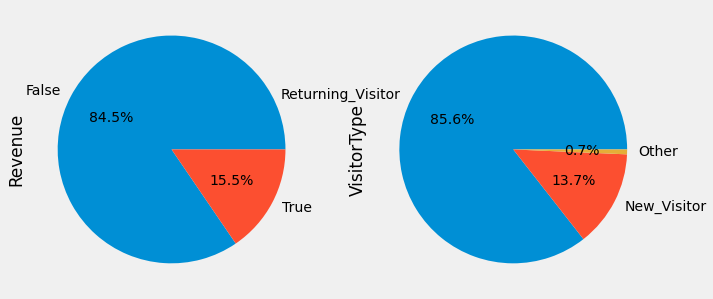

In [5]:
plt.figure(figsize=(10,10))
plt.subplot(121)
df['Revenue'].value_counts().plot(kind='pie',autopct='%.1f%%')
plt.subplot(122)
df['VisitorType'].value_counts().plot(kind='pie',autopct='%.1f%%')
"""From the dataset, 84% of customers have not done shopping. And 86% of customers are returing visitors."""

'Most of the visitors spending time on product related page'

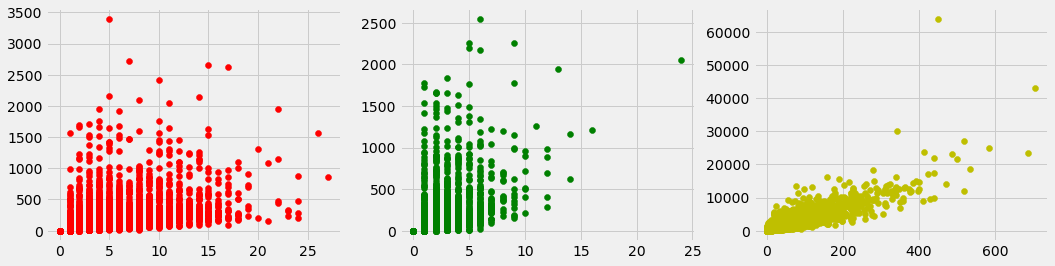

In [6]:
plt.figure(figsize=(16,4))
plt.subplot(131)
plt.scatter(df['Administrative'],df['Administrative_Duration'],color='r')
plt.subplot(132)
plt.scatter(df['Informational'],df['Informational_Duration'],color='g')
plt.subplot(133)
plt.scatter(df['ProductRelated'],df['ProductRelated_Duration'],color='y')
"""Most of the visitors spending time on product related page"""

In [7]:
"""Not much difference in sale rate on normal and special days"""
pd.crosstab(df['Revenue'],df['SpecialDay'])

SpecialDay,0.0,0.2,0.4,0.6,0.8,1.0
Revenue,,,,,,
False,9248,164,230,322,314,144
True,1831,14,13,29,11,10


In [8]:
"""Based on month and visitor type features, count of revenue is analysed."""

pd.crosstab([df['Month'],df['VisitorType']],df['Revenue'])

Revenue                  False  True
Month VisitorType                   
Aug   New_Visitor           51    21
      Returning_Visitor    306    55
Dec   New_Visitor          260    75
      Other                 49    13
      Returning_Visitor   1202   128
Feb   New_Visitor            1     0
      Returning_Visitor    180     3
Jul   New_Visitor           43    11
      Returning_Visitor    323    55
June  New_Visitor           23     7
      Other                  1     0
      Returning_Visitor    235    22
Mar   New_Visitor          196    36
      Returning_Visitor   1519   156
May   New_Visitor          231    88
      Returning_Visitor   2768   277
Nov   New_Visitor          291   128
      Other                 19     3
      Returning_Visitor   1928   629
Oct   New_Visitor           96    28
      Returning_Visitor    338    87
Sep   New_Visitor           80    28
      Returning_Visitor    282    58

In [9]:
df.describe(include='all')

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
count,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330,12330.000000,12330.000000,12330.000000,12330.000000,12330,12330,12330
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10,NaN,NaN,NaN,NaN,3,2,2
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,May,NaN,NaN,NaN,NaN,Returning_Visitor,False,False
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3364,NaN,NaN,NaN,NaN,10551,9462,10422
mean,2.315166,80.818611,0.503569,34.472398,31.731468,1194.746220,0.022191,0.043073,5.889258,0.061427,NaN,2.124006,2.357097,3.147364,4.069586,NaN,NaN,NaN
std,3.321784,176.779107,1.270156,140.749294,44.475503,1913.669288,0.048488,0.048597,18.568437,0.198917,NaN,0.911325,1.717277,2.401591,4.025169,NaN,NaN,NaN
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,1.000000,1.000000,1.000000,1.000000,NaN,NaN,NaN
25%,0.000000,0.000000,0.000000,0.000000,7.000000,184.137500,0.000000,0.014286,0.000000,0.000000,NaN,2.000000,2.000000,1.000000,2.000000,NaN,NaN,NaN
50%,1.000000,7.500000,0.000000,0.000000,18.000000,598.936905,0.003112,0.025156,0.000000,0.000000,NaN,2.000000,2.000000,3.000000,2.000000,NaN,NaN,NaN
75%,4.000000,93.256250,0.000000,0.000000,38.000000,1464.157214,0.016813,0.050000,0.000000,0.000000,NaN,3.000000,2.000000,4.000000,4.000000,NaN,NaN,NaN


In [10]:
df.isnull().sum()

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64

In [11]:
# handling categorical features 

le = LabelEncoder()
df['Month'] = le.fit_transform(df['Month'])
df['VisitorType'] = le.fit_transform(df['VisitorType'])
df['Weekend'] = le.fit_transform(df['Weekend'])
df['Revenue'] = le.fit_transform(df['Revenue'])

In [12]:
dfKmeans = df.drop('Revenue',axis=1)

In [13]:
# Scalling values

scaler = MinMaxScaler()
scaled_df = scaler.fit_transform(dfKmeans)

dfKmeans = pd.DataFrame(scaled_df,columns=dfKmeans.columns)
dfKmeans.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend
0,0.0,0.0,0.0,0.0,0.001418,0.000000,1.00,1.00,0.0,0.0,0.222222,0.000000,0.000000,0.000,0.000000,1.0,0.0
1,0.0,0.0,0.0,0.0,0.002837,0.001000,0.00,0.50,0.0,0.0,0.222222,0.142857,0.083333,0.000,0.052632,1.0,0.0
2,0.0,0.0,0.0,0.0,0.001418,0.000000,1.00,1.00,0.0,0.0,0.222222,0.428571,0.000000,1.000,0.105263,1.0,0.0
3,0.0,0.0,0.0,0.0,0.002837,0.000042,0.25,0.70,0.0,0.0,0.222222,0.285714,0.083333,0.125,0.157895,1.0,0.0
4,0.0,0.0,0.0,0.0,0.014184,0.009809,0.10,0.25,0.0,0.0,0.222222,0.285714,0.166667,0.000,0.157895,1.0,1.0


In [14]:
# Finding N clusters by elbow method.

n_cluster = range(1,10,1)
sse = []
for i in n_cluster:
    k = KMeans(n_clusters=i)
    ypred = k.fit(scaled_df)
    sse.append(k.inertia_)

sse

[8977.629530570663,
 6768.013937146531,
 5619.938835283879,
 4638.295528787045,
 4112.527344033327,
 3772.7268107252553,
 3564.33261721856,
 3224.6763835312463,
 3086.019561201939]

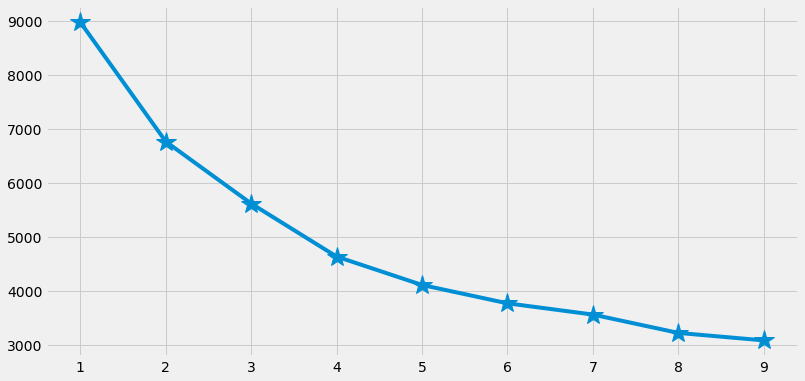

In [15]:
plt.figure(figsize=(12,6))
plt.plot(n_cluster,sse,marker='*',markersize=20)

In [16]:
km = KMeans(n_clusters=4)
ypred = km.fit_predict(dfKmeans)

In [17]:
# dfKmeans['clusters']=ypred

pca = PCA(n_components=2)
dfPCA = pca.fit_transform(dfKmeans)
dfPCA

array([[-0.44925111,  0.80069766],
       [-0.28170419,  0.14437367],
       [-0.44574738,  0.7319541 ],
       ...,
       [ 0.66593704,  0.54944341],
       [-0.21694675, -0.03510954],
       [ 0.87942437, -0.43152567]])

In [18]:
dfPCA = pd.DataFrame(dfPCA,columns=['PCA 1','PCA 2'])
dfPCA.head()

,PCA 1,PCA 2
0,-0.449251,0.800698
1,-0.281704,0.144374
2,-0.445747,0.731954
3,-0.333652,0.338048
4,0.709525,0.299958


In [19]:
dfPCA['cluster'] = ypred

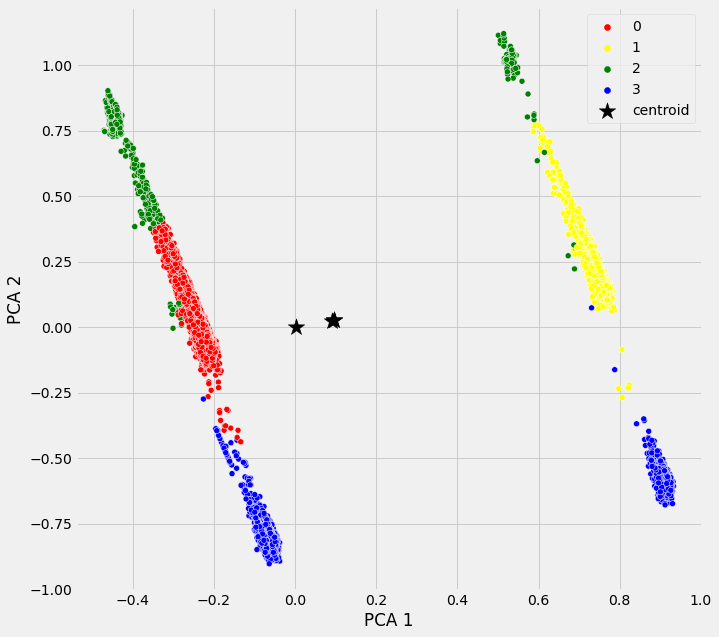

In [20]:
plt.figure(figsize=(10,10))
sns.scatterplot(dfPCA['PCA 1'],dfPCA['PCA 2'],hue = dfPCA['cluster'],palette=['red','yellow','green','blue'])
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='black',s=300,marker='*',label='centroid')
plt.legend()

In [21]:
# Splitting dataset

x = df.drop('Revenue',axis=1)
y = df['Revenue']

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=10)

In [22]:
y

0        0
1        0
2        0
3        0
4        0
        ..
12325    0
12326    0
12327    0
12328    0
12329    0
Name: Revenue, Length: 12330, dtype: int64

In [23]:
def logisticReg(x_train,x_test,y_train,y_test):
    lr = LogisticRegression()
    lr.fit(x_train,y_train)
    y_pred = lr.predict(x_test)
    print('***LogisticRegression***')
    print('Confusion matrix')
    print(confusion_matrix(y_test,y_pred))
    print('Classification report')
    print(classification_report(y_test,y_pred))

In [27]:
def randomForest(x_train,x_test,y_train,y_test):
    rf = RandomForestClassifier()
    rf.fit(x_train,y_train)
    ypred = rf.predict(x_test)
    print('***RandokmForestClassifier***')
    print('Confusion matrix')
    print(confusion_matrix(y_test,ypred))
    print('Classification report')
    print(classification_report(y_test,ypred))
     

In [29]:
def compareModel(x_train,x_test,y_train,y_test):
    logisticReg(x_train,x_test,y_train,y_test)
    print('-'*100)
    randomForest(x_train,x_test,y_train,y_test)
    print('-'*100)

In [30]:
compareModel(x_train, x_test, y_train, y_test)

***LogisticRegression***
Confusion matrix
[[3033   82]
 [ 370  214]]
Classification report
              precision    recall  f1-score   support

           0       0.89      0.97      0.93      3115
           1       0.72      0.37      0.49       584

    accuracy                           0.88      3699
   macro avg       0.81      0.67      0.71      3699
weighted avg       0.86      0.88      0.86      3699

----------------------------------------------------------------------------------------------------
***RandokmForestClassifier***
Confusion matrix
[[3013  102]
 [ 273  311]]
Classification report
              precision    recall  f1-score   support

           0       0.92      0.97      0.94      3115
           1       0.75      0.53      0.62       584

    accuracy                           0.90      3699
   macro avg       0.83      0.75      0.78      3699
weighted avg       0.89      0.90      0.89      3699

----------------------------------------------------------

In [32]:
rf = RandomForestClassifier()
rf.fit(x_train,y_train)
ypred = rf.predict(x_test)

In [34]:
cv = cross_val_score(rf,x,y,cv=5)
np.mean(cv)

0.8961070559610705

In [36]:
pickle.dump(rf,open('model.pkl','wb'))